Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# # Define a Sequential model to include data augmentation layers
# data_augmentation = tf.keras.Sequential([
  
#   # Randomly flip images 
#   layers.RandomFlip("horizontal_and_vertical"),

#   # Randomly rotate images by a fraction of 2π
#   layers.RandomRotation(0.2),
  
#   # Randomly zoom images in and out
#   layers.RandomZoom(0.2),
  
#   # Randomly adjust the brightness of images
#    layers.RandomBrightness(0.2)
# ])

# # Example: Applying the data augmentation to a dataset
# (train_ds, val_ds, test_ds), metadata = tf.keras.utils.image_dataset_from_directory(
#     'path/to/dataset',
#     labels='inferred',
#     label_mode='int',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=123,
#     validation_split=0.2,
#     subset="training",
#     interpolation='bilinear',
#     follow_links=False,
# )

# # Apply the data augmentation to the training dataset
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [3]:

import tensorflow as tf
import numpy as np
from PIL import Image
import os
# Load and preprocess the image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image

# Define the preprocessing pipeline
def preprocess_pipeline(image):
    # image = layers.RandomFlip('horizontal_and_vertical')(image)
    # image = layers.RandomRotation(0.2)(image)
    # image = layers.RandomZoom(0.2, 0.2)(image)
    # image = layers.RandomContrast(0.2)(image)
    # image = layers.RandomTranslation(0.2, 0.2)(image)
    # image = layers.RandomCrop(224, 224)(image)  # Assuming target size is 224x224
    return image
count = 0
for filename in os.listdir(data_dir_check / "A"):
    if filename.endswith('.jpg'):
        count+=1
        # image_path = os.path.join(pathlib.Path.cwd(), data_dir_check, filename)
        image_path = os.path.join(data_dir_check / "A", filename)
        # Apply the preprocessing
        image = load_and_preprocess_image(image_path)
        augmented_image = preprocess_pipeline(image)

        # Convert the tensor to an image and save
        augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image.numpy())
        augmented_image.save(os.path.join(output_dir_check, f"{filename[:-4]}_aug_{count}.jpg"))
    else: continue


NameError: name 'data_dir_check' is not defined

In [ ]:

# # Define data augmentation
# data_augmentation = keras.Sequential([

#     layers.RandomFlip("horizontal_and_vertical"),

#     # Randomly rotate images by a fraction of 2π
#     layers.RandomRotation(0.2),

#     # Randomly zoom images in and out
#     layers.RandomZoom(0.2),

#     # Randomly adjust the brightness of images
#     layers.RandomBrightness(0.2)
# ])
# #     layers.experimental.preprocessing.RandomFlip("horizontal", 
# #                                                  input_shape=(img_height, 
# #                                                               img_width,
# #                                                               3)),
# #     layers.experimental.preprocessing.RandomRotation(0.1),
# #     layers.experimental.preprocessing.RandomZoom(0.1),
# # ])

# # Add data augmentation to the beginning of the model
# model.layers.insert(0, data_augmentation)

# """In this code, we first create the model using the create_simplified_vgg16_model function. 
# We then define the data augmentation layers in a separate Sequential model. 
# Finally, we add the data augmentation layers to the beginning of the model using the insert method.
# Note that we specify the input_shape argument in the RandomFlip layer to match the input shape of the model. 
# The other data augmentation layers will automatically infer their input shape from the preceding layer."""

In [ ]:
# def create_simplified_vgg16_model():
#     # Data augmentation
#     data_augmentation = keras.Sequential([
#         layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                      input_shape=(img_height, 
#                                                                   img_width,
#                                                                   3)),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#         layers.experimental.preprocessing.RandomZoom(0.1),
#     ])

#     # Create a Sequential model
#     model = Sequential([
#         # Add the data augmentation layer
#         data_augmentation,

#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255),

#         # Convolutional block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Convolutional block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Convolutional block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2)),

#         # Flatten layer
#         Flatten(),

#         # Fully connected layers
#         Dense(128, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model


In [ ]:
# import pathlib
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import os
# import PIL
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

# # Count the number of images in the training data directory
# # This is done by listing all files with .jpg extension in all subdirectories
# # of the training data directory and getting the length of the list
# image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# # Print the number of images in the training data directory
# print(image_count_train)

# # Count the number of images in the testing data directory
# # This is done by listing all files with .jpg extension in all subdirectories
# # of the testing data directory and getting the length of the list
# image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# # Print the number of images in the testing data directory
# print(image_count_test)

# batch_size = 32
# img_height = 180
# img_width = 180

# ## Write your train dataset here
# ## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# ## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_train,
#     # labels='inferred', #the labels are automatically inferred from the subdirectory names.
#     # label_mode='int', #The labels are encoded as integers
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

#     ## Write your validation dataset here
# ## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# ## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_train,
#     # labels='inferred',
#     # label_mode='int',
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

#     # List out all the classes of skin cancer and store them in a list.
# # You can find the class names in the class_names attribute on these datasets.
# # These correspond to the directory names in alphabetical order.
# class_names = train_ds.class_names # correspond to the directory names in alphabetical order.
# print(class_names)

# # Set AUTOTUNE to tf.data.experimental.AUTOTUNE to dynamically adjust the prefetch buffer size based on the system environment.
# # represents the best possible performance for data prefetching.
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# # Cache the train dataset in memory, shuffle the data randomly and prefetch elements from the dataset for faster data retrieval.
# # Shuffling with a buffer of 1000 ensures that the data is well mixed.
# # The argument 1000 represents the buffer size for shuffling, which determines how many elements are shuffled at a time.
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# # Cache the validation dataset in memory and prefetch elements from the dataset for faster data retrieval.
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# counts = []
# for c in class_names:
#     counts.append(len(list(data_dir_train.glob(str(c) + '/*.jpg'))))

# # Create a DataFrame with the counts
# class_dist = pd.DataFrame({'class': class_names, 'count': counts})




In [1]:
import tensorflow as tf

# Check if a GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")



2024-03-15 23:08:50.096118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 23:08:50.590934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 23:08:50.591159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 23:08:50.662207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 23:08:50.803506: I tensorflow/core/platform/cpu_feature_guar

GPU is available


2024-03-15 23:08:59.651497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 23:08:59.816173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 23:08:59.816243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
# # If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive/')

# #Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("./gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# data_dir_test = pathlib.Path("./gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# # Make sure to place this code at the beginning of your program, before any models or tensors are created
# #  Ensure that the GPU configuration is the first thing you set up in your TensorFlow environment
# # Allow memory growth for the GPU
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
# Count the number of images in the training data directory
# This is done by listing all files with .jpg extension in all subdirectories
# of the training data directory and getting the length of the list
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# Print the number of images in the training data directory
print(image_count_train)

# Count the number of images in the testing data directory
# This is done by listing all files with .jpg extension in all subdirectories
# of the testing data directory and getting the length of the list
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# Print the number of images in the testing data directory
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [3]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [4]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    # labels='inferred', #the labels are automatically inferred from the subdirectory names.
    # label_mode='int', #The labels are encoded as integers
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2024-03-15 09:45:55.982708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 124 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
2024-03-15 09:45:56.001396: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1566] failed to allocate 124.75MiB (130809856 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


In [5]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    # labels='inferred',
    # label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Using 447 files for validation.


In [6]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names # correspond to the directory names in alphabetical order.
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [2]:
# Create a dictionary to store one image per class
images_per_class = {}

# # Iterate over the train dataset and store the first image of each class
# for image, label in train_ds: #label is a tensor object in TensorFlow, with shape (32,). Each element represents the label for one image in the batch.
#   for im, l in zip(image, label): #loop through each element in the tensor

#   # Check if the label is already in the dictionary
#     if l.numpy() in images_per_class:
#       # Skip the image
#       continue
#     else:
#       # Store the image in the dictionary
#       images_per_class[l.numpy()] = im
#       # Check if the dictionary has all the classes
#       if len(images_per_class) == 10:
#         # Break the loop
#         break

for image, label in train_ds:
    for im, l in zip(image, label):
        images_per_class.setdefault(l.numpy(), im) # setdefault() sets a value for a key in the dictionary only if the key is not already in the dictionary.
        if len(images_per_class) == 10:
            break
    if len(images_per_class) == 10:
        break

# for images, labels in train_ds.take(1): # Take one batch from the training dataset

plt.figure(figsize=(10, 10)) # Set the figure size

for label, image in images_per_class.items():
  ax = plt.subplot(3, 3, label + 1) # Create a subplot for each image
  plt.imshow(image.numpy().astype("uint8")) # Display the image
  plt.title(class_names[label]) # Set the title of the plot to the corresponding class name
  plt.axis("off") # Turn off the axis

plt.show()

## alternative from the web
# link: https://www.kaggle.com/code/pattnaiksatyajit/skin-cancer-detection-starter
# import matplotlib.image as mpimg
# plt.figure(figsize=(10,10))
# for i in range(9):
#   plt.subplot(3, 3, i + 1)
#   image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
# image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1])): This line is doing several things:

# data_dir_train.glob(class_names[i]+'/*.jpg'): This lists all the .jpg files in the directory of the current class.
# list(...)[1]: This converts the glob object to a list and selects the second file (Python uses 0-based indexing, so 1 is the second element).
# str(...): This converts the selected file's path to a string.
# mpimg.imread(...): This reads the image file and converts it to an array that can be used for plotting.
#   plt.title(class_names[i])
#   plt.imshow(image)

NameError: name 'train_ds' is not defined

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
# Set AUTOTUNE to tf.data.experimental.AUTOTUNE to dynamically adjust the prefetch buffer size based on the system environment.
# represents the best possible performance for data prefetching.
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the train dataset in memory, shuffle the data randomly and prefetch elements from the dataset for faster data retrieval.
# Shuffling with a buffer of 1000 ensures that the data is well mixed.
# The argument 1000 represents the buffer size for shuffling, which determines how many elements are shuffled at a time.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset in memory and prefetch elements from the dataset for faster data retrieval.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Define the model
# model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# # Block 1
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(180, 180, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 2
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 3
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 4
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 5
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Classification block
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(9, activation='softmax'))  # Assuming 9 classes for the output layer

# # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Model summary
# model.summary()

# history = model.fit(
#     train_ds,
#     epochs=20,
#     validation_data=val_ds,
#     verbose=1
# )

In [ ]:
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# num_classes = 9
# model = Sequential([
#                     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
# ])
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu', input_shape = (180, 180, 32)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(num_classes, activation = "softmax"))

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # View the summary of all layers
# model.summary()



In [ ]:
# Importing required layers from tensorflow.keras to build model
from keras.layers import Conv2D     # Convolutional 2D Layer for image processing
from keras.layers import MaxPooling2D  # MaxPooling 2D Layer for downsampling input
from keras.layers import Flatten    # Flatten Layer for transforming input to 1D array
from keras.layers import Dense      # Dense Layer for output and hidden layers


In [ ]:
# initialize create_vgg16_model function
def create_vgg16_model():

    # Clear the Keras session
    tf.keras.backend.clear_session()
    
    # Create a Sequential model
    model = Sequential([

        # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
        # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
        # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
        # Normalize pixel values between 0 and 1
        layers.Rescaling(1./255),

        # conv block 1
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # conv block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        ## Classification block

        # flatten layer
        Flatten(),

        # Fully Connected Layers
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(9, activation='softmax')
    ])

    return model



In [ ]:

# create the model
model = create_vgg16_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    52,432,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │        36,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,965,769 (320.30 MB)

 Trainable params: 83,965,769 (320.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


I0000 00:00:1710475533.680650   34306 service.cc:145] XLA service 0x703b20019160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710475533.680706   34306 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-03-15 04:05:33.817798: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-15 04:05:34.487479: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1710475562.967205   34306 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 500ms/step - accuracy: 0.2290 - loss: 2.8930 - val_accuracy: 0.2058 - val_loss: 2.0529
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.2073 - loss: 2.0014 - val_accuracy: 0.1924 - val_loss: 2.0333
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.1928 - loss: 2.0058 - val_accuracy: 0.2058 - val_loss: 2.0350
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.2032 - loss: 2.0242 - val_accuracy: 0.2058 - val_loss: 2.0227
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - accuracy: 0.1996 - loss: 1.9949 - val_accuracy: 0.2058 - val_loss: 2.0245
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.1744 - loss: 2.0413 - val_accuracy: 0.2058 - val_loss: 2.0262
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.1953 - loss: 2.0369 - val_accuracy: 0.2058 - val_loss: 2.0254
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.2025 - loss: 2.0471 - val_accuracy: 0.205

In [ ]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# def create_model():
#     # Create a Sequential model
#     model = Sequential([
#         # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
#         # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
#         # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255), #input_shape=(img_height, img_width,3)),

#         # conv block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same'), #input_shape=(img_height, img_width, 32)),
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         # Conv2D(256, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # # conv block 4
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # # conv block 5
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # Conv2D(512, (3, 3), activation='relu', padding='same'),
#         # MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # flatten layer
#         Flatten(),

#         # Fully Connected Layers
#         # Dense(4096, activation='relu'),
#         # Dense(4096, activation='relu'),
#         Dense(1024, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model

# # Compile the model
# model = create_model()

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # model.build(input_shape=(None, img_height, img_width, 3))
# # model.summary()

# # train the model
# epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )



In [ ]:
## simplified the model

# initialize create_simplified_vgg16_model function
def create_simplified_vgg16_model():
    
    # Clear the Keras session
    tf.keras.backend.clear_session()

    # Create a Sequential model
    model = Sequential([

        # Normalize pixel values between 0 and 1
        layers.Rescaling(1./255),

        # Convolutional block 1
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten layer
        Flatten(),

        # Fully connected layers
        Dense(128, activation='relu'),
        Dense(9, activation='softmax')
    ])

    return model


In [ ]:

# create the model
model = create_simplified_vgg16_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.1703 - loss: 2.2643 - val_accuracy: 0.1588 - val_loss: 2.0436
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2752 - loss: 1.9236 - val_accuracy: 0.4206 - val_loss: 1.6424
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4222 - loss: 1.5818 - val_accuracy: 0.5190 - val_loss: 1.3844
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5131 - loss: 1.3790 - val_accuracy: 0.5324 - val_loss: 1.4008
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5328 - loss: 1.3131 - val_accuracy: 0.4855 - val_loss: 1.4813
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5440 - loss: 1.2736 - val_accuracy: 0.5347 - val_loss: 1.4160
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5772 - loss: 1.2190 - val_accuracy: 0.5436 - val_loss: 1.3403
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6189 - loss: 1.0695 - val_accuracy: 0.5526 - v

In [ ]:
# install required packages
!pip install pydot
!sudo apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-7build3).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


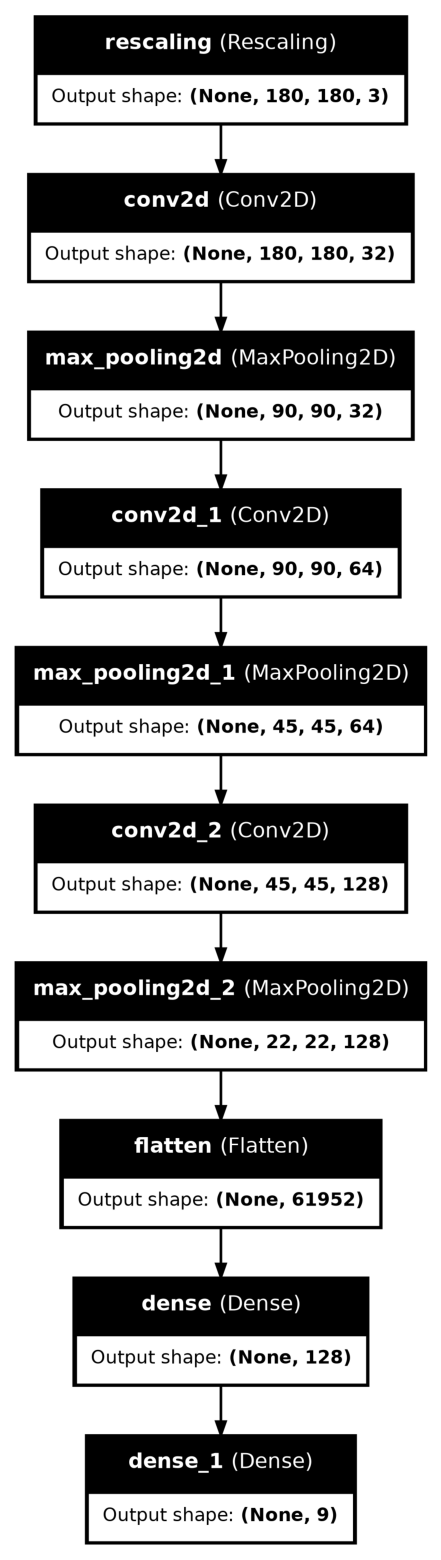

In [ ]:
## visualize the model

# import required libraries
from keras.utils import plot_model

# plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(20, 20)) # Set the figure size

# Display the image
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()



In [ ]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# def create_model():
#     # Create a Sequential model
#     model = Sequential([
#         # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
#         # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
#         # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.
#         # Normalize pixel values between 0 and 1
#         layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),

#         # conv block 1
#         Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 32)),
#         Conv2D(32, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 2
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#         # conv block 3
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),


#         # flatten layer
#         Flatten(),

#         # Fully Connected Layers
#         Dense(1000, activation='relu'),
#         # Dense(4096, activation='relu'),
#         Dense(9, activation='softmax')
#     ])

#     return model

# # Compile the model
# model = create_model()

# # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# # train the model
# epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )


In [ ]:
# # Create the model
# model = create_model()
# # model.summary()

In [ ]:
# ### Your code goes here
# # layers.experimental.preprocessing.Rescaling(1./255) is used to normalize pixel values between [0, 1].
# # The RGB channel values are in the [0, 255] range, and this is not ideal for a neural network.
# # By dividing pixel values by 255, we can standardize them to be in the [0, 1] range.

# # Create a Sequential model
# model = Sequential([
#     # Normalize pixel values between 0 and 1
#     layers.experimental.preprocessing.Rescaling(1./255),
#     # First convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(32, 3, activation='relu'),
#     # Max pooling layer
#     # the 2D part indicates that the input is a 2-dimensional tensor, which is typical for image data.
#     # The default pool size for MaxPooling2D is 2x2, meaning the input is divided into 2x2 subregions.
#     # The maximum value from each subregion becomes the output value.
#     # The pooling operation is typically used to reduce the spatial size of the feature map while retaining the most important information
#     # This helps to reduce the number of parameters in the model and also makes it more efficient to process.
#     layers.MaxPooling2D(),
#     # Second convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(64, 3, activation='relu'),
#     # Max pooling layer
#     layers.MaxPooling2D(),
#     # Third convolutional layer with 32 filters, a kernel size of 3x3, and a ReLU activation
#     layers.Conv2D(128, 3, activation='relu'),
#     # Max pooling layer
#     layers.MaxPooling2D(),
#     # Flatten layer to convert the 3D feature maps to a 1D vector
#     layers.Flatten(),
#     # Dense layer with 128 units and a ReLU activation
#     layers.Dense(128, activation='relu'),
#     # Final dense layer with 9 units for the 9 classes and a softmax activation
#     layers.Dense(9, activation='softmax')
# ])

# # This CNN model has three convolutional layers, three max pooling layers, a dense layer, and a softmax output laye

plot model

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# Function to compile and train the model with different optimizers
def try_all_optimizers(epochs=10):
    optimizers = [SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl]
    for opt in optimizers:
        model = create_simplified_vgg16_model()
        model.compile(optimizer=opt(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f'Training with {opt.__name__} optimizer')
        history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)
        print(f'{opt.__name__} Training Loss: {history.history["loss"][-1]}')
        print(f'{opt.__name__} Training Accuracy: {history.history["accuracy"][-1]}')
        print('-----------------------------------')

# Example usage:
try_all_optimizers()


Training with SGD optimizer
Epoch 1/10


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.1647 - loss: 2.0529 - val_accuracy: 0.2595 - val_loss: 2.0233
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2277 - loss: 2.0093 - val_accuracy: 0.1946 - val_loss: 2.0120
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2250 - loss: 2.0109 - val_accuracy: 0.3199 - val_loss: 1.9889
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2631 - loss: 1.9819 - val_accuracy: 0.2506 - val_loss: 1.9792
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2662 - loss: 1.9490 - val_accuracy: 0.2752 - val_loss: 1.9284
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2681 - loss: 1.9375 - val_accuracy: 0.3177 - val_loss: 1.8713
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3029 - loss: 1.9124 - val_accuracy: 0.3557 - val_loss: 1.8442
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3049 - loss: 1.8622 - val_accuracy: 0.3870 - val_loss: 1.

In [ ]:
# Function to compile and train the model with different optimizers
def try_selected_optimizers(epochs=20):
    selected_optimizers = [Adam, AdamW, Nadam]
    for opt in selected_optimizers:
        model = create_simplified_vgg16_model()
        model.compile(optimizer=opt(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f'Training with {opt.__name__} optimizer')
        history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)
        print(f'{opt.__name__} Training Loss: {history.history["loss"][-1]}')
        print(f'{opt.__name__} Training Accuracy: {history.history["accuracy"][-1]}')
        print('-----------------------------------')

# Example usage:
try_selected_optimizers()


Training with Adam optimizer
Epoch 1/20


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.1980 - loss: 2.3566 - val_accuracy: 0.3020 - val_loss: 1.8952
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3172 - loss: 1.8289 - val_accuracy: 0.4027 - val_loss: 1.6965
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4550 - loss: 1.5268 - val_accuracy: 0.4899 - val_loss: 1.4809
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5094 - loss: 1.4169 - val_accuracy: 0.5168 - val_loss: 1.4674
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5015 - loss: 1.4106 - val_accuracy: 0.5123 - val_loss: 1.4768
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5542 - loss: 1.2403 - val_accuracy: 0.5213 - val_loss: 1.5193
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5830 - loss: 1.1380 - val_accuracy: 0.4989 - val_loss: 1.6549
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5663 - loss: 1.2193 - val_accuracy: 0.5034 - val_loss: 1.

In [ ]:
# ### Todo, choose an appropirate optimiser and loss function
# select Adam as apropriate
model = create_simplified_vgg16_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.build(input_shape=(None, img_height, img_width, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2145 - loss: 2.6901 - val_accuracy: 0.3647 - val_loss: 1.8261
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3191 - loss: 1.8370 - val_accuracy: 0.5011 - val_loss: 1.4746
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4805 - loss: 1.4599 - val_accuracy: 0.4855 - val_loss: 1.5176
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5384 - loss: 1.3128 - val_accuracy: 0.4720 - val_loss: 1.6012
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5590 - loss: 1.2561 - val_accuracy: 0.5347 - val_loss: 1.4325
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5861 - loss: 1.1824 - val_accuracy: 0.5056 - val_loss: 1.4417
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6076 - loss: 1.0765 - val_accuracy: 0.5414 - val_loss: 1.4310
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6116 - loss: 1.0493 - val_accuracy: 0.5660 - v

### Visualizing training results

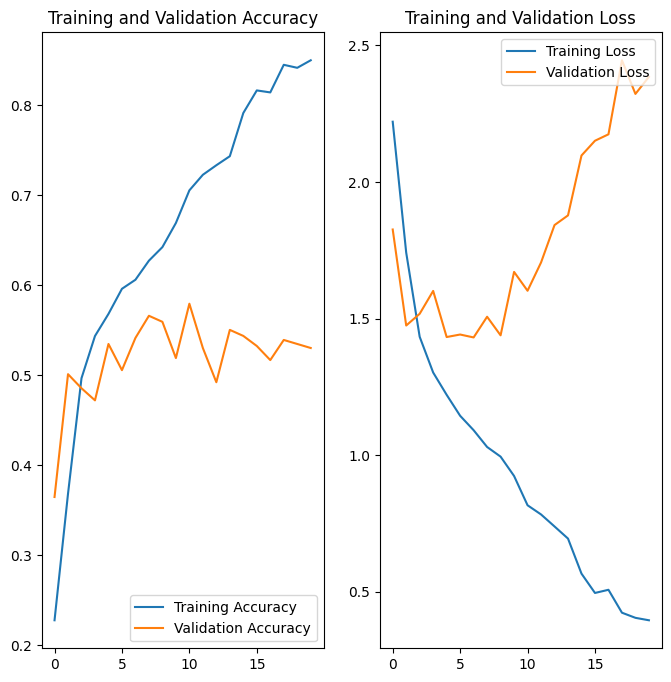

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

- The model accuracy on training data show promising improvment over the course of 20 epochs.
- There are indications of overfitting because validation accuracy is declining while training accuracy continue to rise.
- Apply data augmentation techniques to overcome overfitting.

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# ideas gotten from https://www.youtube.com/watch?v=o1zcWYrulEQ
# Define data augmentation
data_augmentation = keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),

    # Randomly rotate images by a fraction of 2
    layers.RandomRotation(1),

    # # Randomly zoom images in and out
    # layers.RandomZoom(0.2),

    # Randomly adjust the brightness of images
    layers.RandomBrightness(0.2)
])



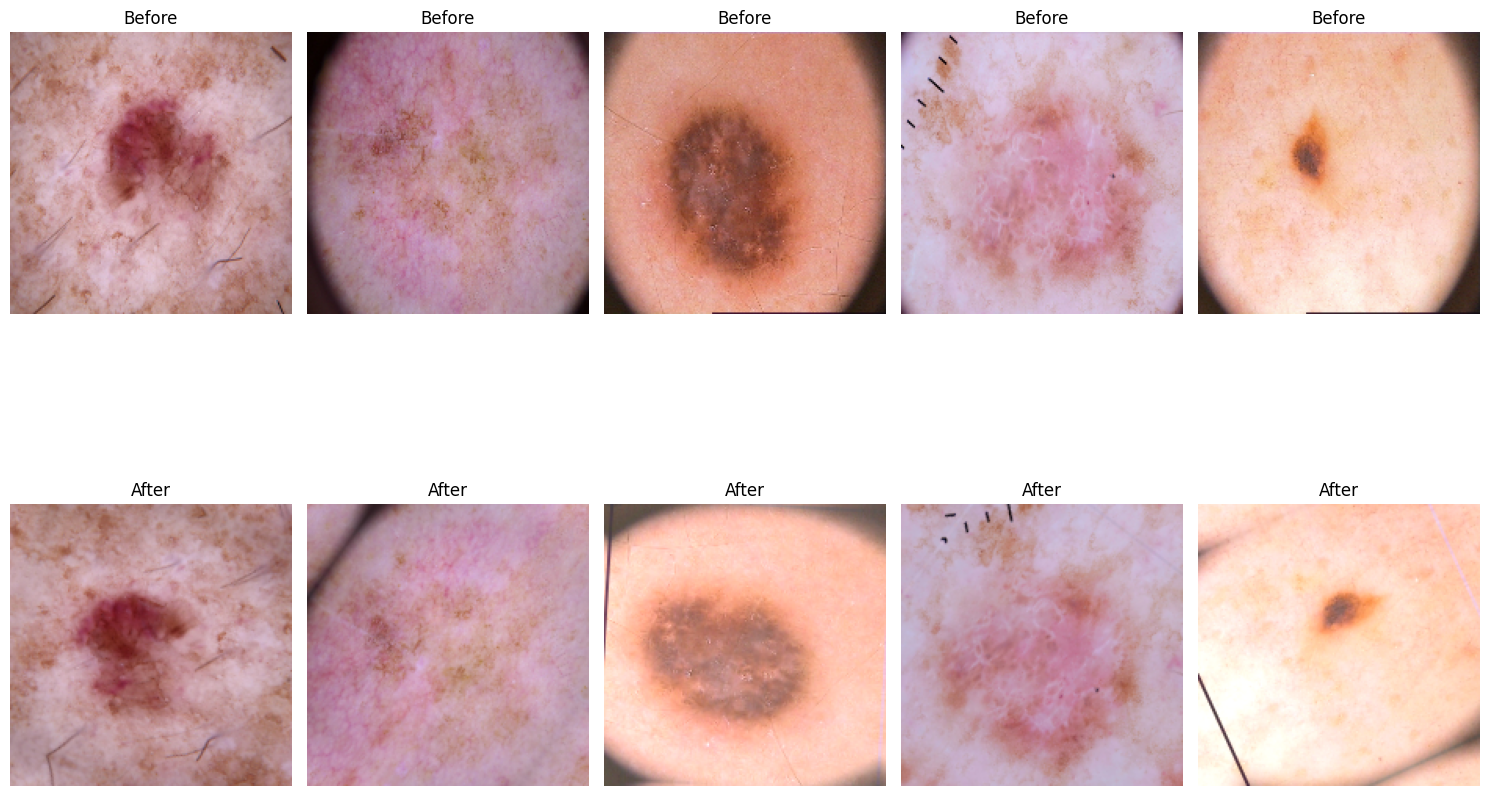

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Take one batch of images and labels from the training dataset
images, labels = next(iter(train_ds))

# Apply the data_augmentation layers to the batch of images
augmented_images = data_augmentation(images)

# Plot the original and augmented images
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title('Before')

    plt.subplot(3, 5, i + 6)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title('After')

plt.tight_layout()

### Todo:
### Create the model, compile and train the model


In [ ]:

# from tensorflow.keras.models import Model
# model = create_simplified_vgg16_model()
# # Assume 'model' is your original Keras model
# # Get the output of the first layer to be removed
# layer_output = model.layers[0].output

# # Create a new input layer (make sure to match the input shape of the second layer)
# new_input = model.layers[0].input

# # Rebuild the model from the second layer onwards
# new_model = Model(new_input, layer_output)

# # Add the rest of the layers from the original model to the new model
# for layer in model.layers[1:]:
#     new_model = Model(new_input, layer.output(new_model.output))

# # Now 'new_model' has the same layers as 'model', minus the first layer


AttributeError: Layer rescaling_18 has no inbound nodes.

In [ ]:
# data_augmentation.build(input_shape=(None, img_height, img_width, 3))

# data_augmentation.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_brightness_1 (Rando  (None, 180, 180, 3)       0         
 mBrightness)                                                    
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_68 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_brightness_2 (Rando  (None, 180, 180, 3)       0         
 mBrightness)                                                    
                                                                 
 conv2d_201 (Conv2D)         (None, 180, 180, 32)   

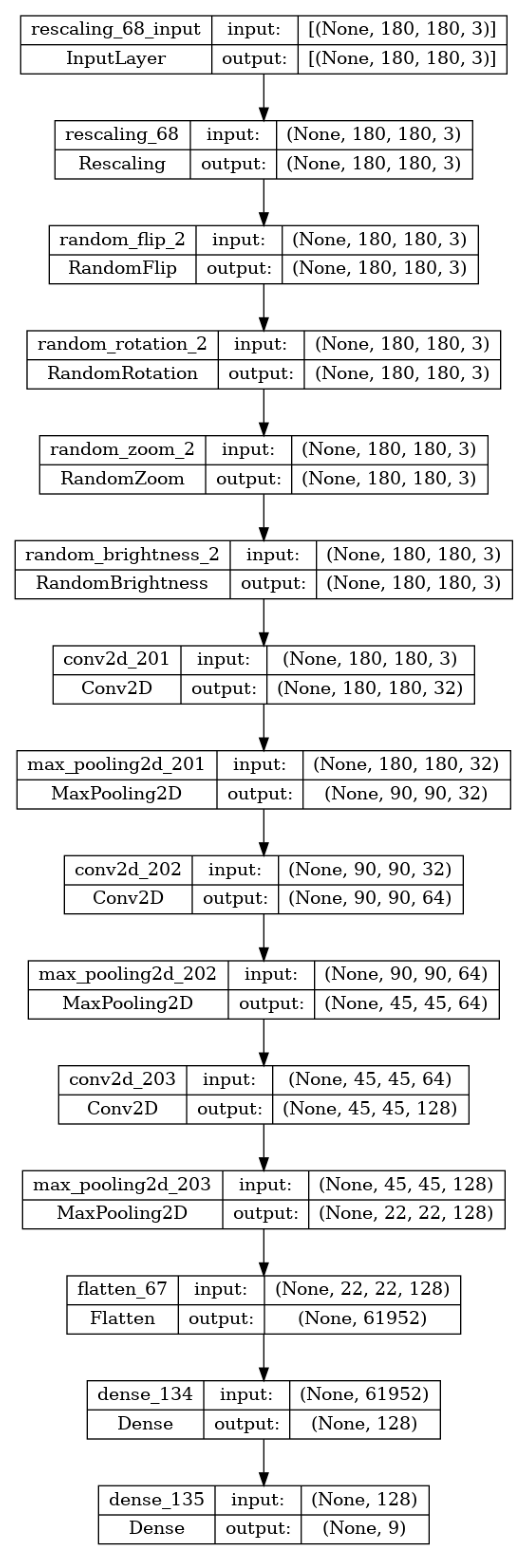

In [ ]:
# # Create a simplified version of the VGG16 model
# old_model = create_simplified_vgg16_model()

# # Extract the first layer of the old model
# rescale_layers = Sequential(old_model.layers[0])

# # Extract the remaining layers of the old model
# remain_layers = Sequential(old_model.layers[1:])

# # initialize model
# model = Sequential()

# # Add the rescale layers to the new model
# [model.add(layer) for layer in rescale_layers.layers]

# # Add the data augmentation layers to the new model
# [model.add(layer) for layer in data_augmentation.layers]

# # Add the remaining layers of the old model to the new model
# [model.add(layer) for layer in remain_layers.layers]

# # build the model
# model.build(input_shape=(None, img_height, img_width, 3))

# # model summary
# model.summary()

# # plot the model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# plt.figure(figsize=(20, 20)) # Set the figure size

# # Display the image
# plt.imshow(plt.imread('model.png'))
# plt.axis('off')
# plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 180, 180, 3)    │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

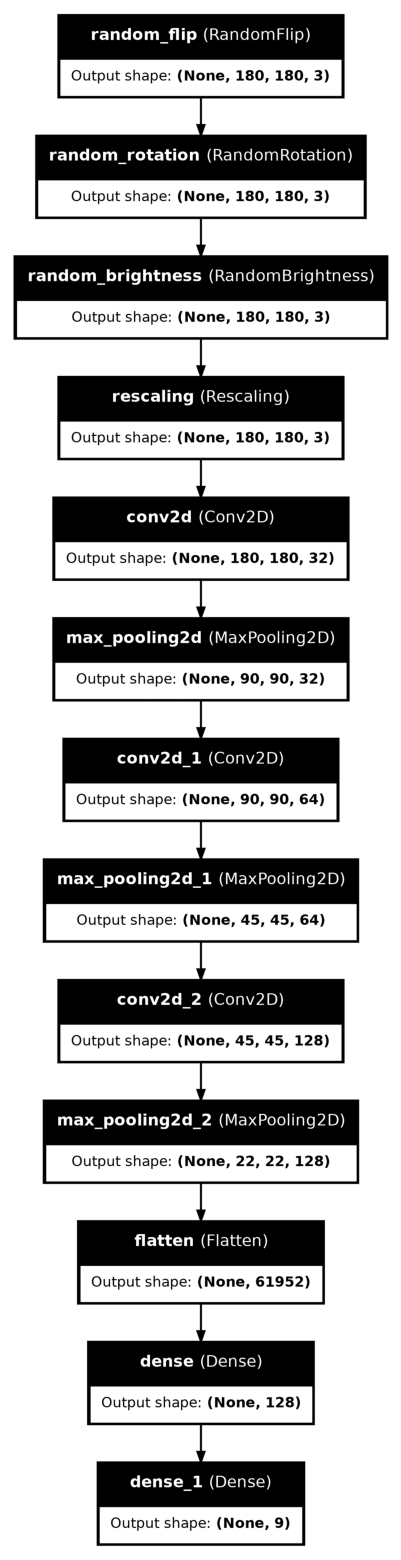

In [ ]:
from keras.utils import plot_model

# Create a simplified version of the VGG16 model
old_model = create_simplified_vgg16_model()

# initialize new model
model = Sequential()

# Add the data augmentation layers to the new model
[model.add(layer) for layer in data_augmentation.layers]

# Add the old model layers to the new model
[model.add(layer) for layer in old_model.layers]

# build the model
model.build(input_shape=(None, img_height, img_width, 3))

# model summary
model.summary()

# plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(20, 20)) # Set the figure size

# Display the image
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

In [ ]:
# # # create the model
# model = create_simplified_vgg16_model()

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # # Add data augmentation to the beginning of the model
# # model.layers.insert(0, data_augmentation)

# # train the model
# epochs = 20
# history = model.fit(train_ds, 
#                     validation_data=val_ds,
#                     epochs=epochs)

Epoch 1/20


56/56 [==============================] - 15s 172ms/step - loss: 2.2046 - accuracy: 0.2266 - val_loss: 1.9782 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 10s 153ms/step - loss: 1.7795 - accuracy: 0.3488 - val_loss: 1.6238 - val_accuracy: 0.4362
Epoch 3/20
 2/56 [>.............................] - ETA: 21s - loss: 1.6275 - accuracy: 0.3750 

KeyboardInterrupt: 

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.1832 - loss: 2.1910 - val_accuracy: 0.3870 - val_loss: 1.7749
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3602 - loss: 1.7549 - val_accuracy: 0.4116 - val_loss: 1.6685
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4134 - loss: 1.5883 - val_accuracy: 0.5257 - val_loss: 1.4371
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4731 - loss: 1.4627 - val_accuracy: 0.4586 - val_loss: 1.5345
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4677 - loss: 1.4500 - val_accuracy: 0.4966 - val_loss: 1.4067
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4659 - loss: 1.4593 - val_accuracy: 0.5235 - val_loss: 1.3921
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4954 - loss: 1.3956 - val_accuracy: 0.5034 - val_loss: 1.4054
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5037 - loss: 1.3511 - val_accuracy: 0.5324 - v

### Visualizing the results

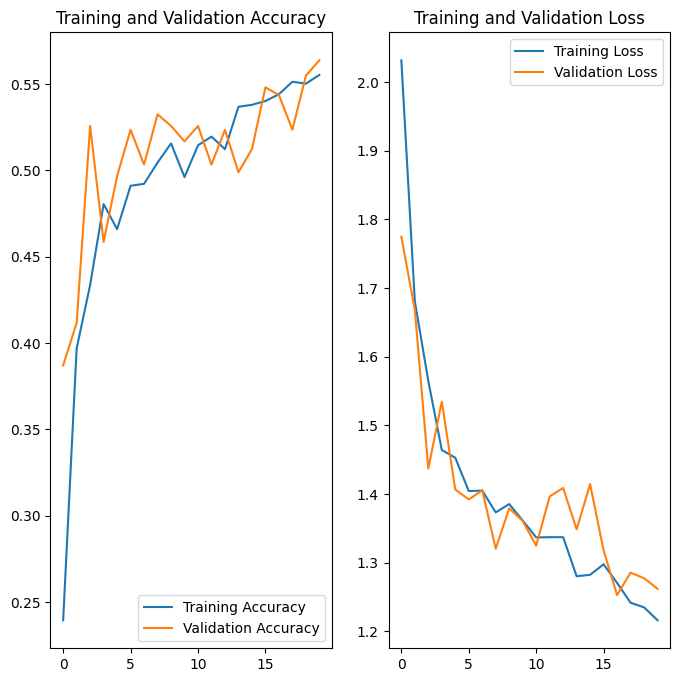

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- __Model Underfit__: The training loss does not decrease significantly.
- __Improvement__: Compared to the previous model run, the model overfiting issue has been handled profoundly. However, the model still seems to be underfitting, and there is room for improvement.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

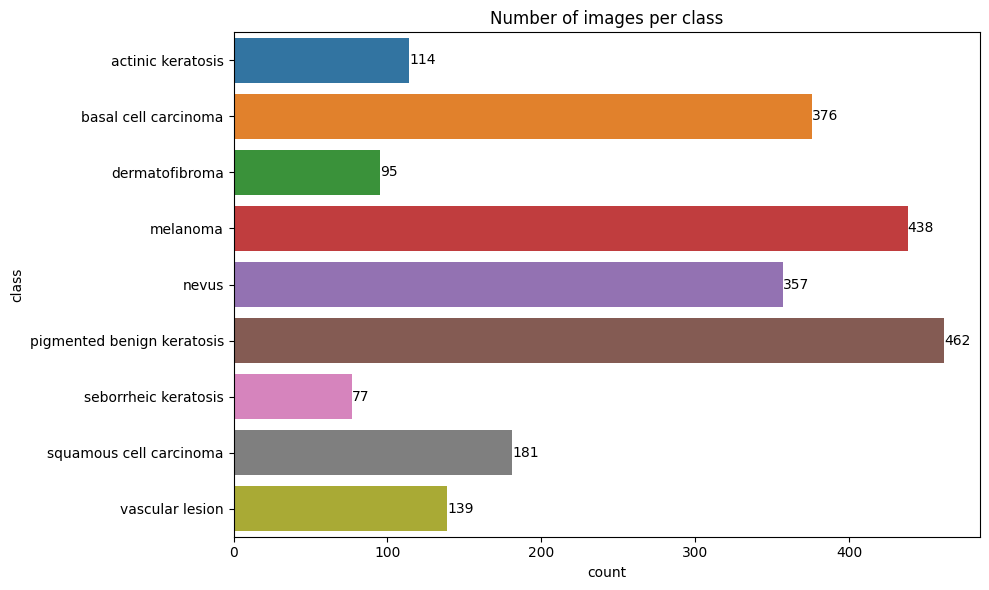

In [ ]:
## Your code goes here.
# Get the count of images in each class
counts = []
for c in class_names:
    counts.append(len(list(data_dir_train.glob(str(c) + '/*.jpg'))))

# Create a DataFrame with the counts
class_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=class_dist, y='class', x='count', hue='class', legend=False)
plt.title('Number of images per class')

# Add bar labels
[ax.bar_label(container) for container in ax.containers] 

plt.tight_layout()
plt.show()



In [ ]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


#### augmentor

In [ ]:

# Importing the Augmentor package for data augmentation
import Augmentor
import shutil

try:
    shutil.rmtree("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")
except:
    pass    

# Define the new directory
data_dir_train_aug = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")

# Create the new directory
data_dir_train_aug.mkdir(parents=True, exist_ok=True)


# # Delete all output folders
# for c in class_names:
#     output_dir = data_dir_train_aug / c / "output"
#     shutil.rmtree(output_dir)

In [ ]:
# Unbatch the dataset
train_ds_unbatched = train_ds.unbatch()

# Initialize a counter
i = 0

# Iterate over the train_ds and copy the images to the new directory
for image, label in train_ds_unbatched:
    class_name = class_names[label.numpy()]
    new_class_dir = data_dir_train_aug / class_name
    new_class_dir.mkdir(parents=True, exist_ok=True)
    filename = f"image_{i}.jpg"
    tf.keras.preprocessing.image.save_img(new_class_dir / filename, image)
    i += 1

2024-03-15 08:25:31.103573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
image_count_train_aug = len(list(data_dir_train_aug.glob('*/*.jpg')))

# Print the number of images in the Train_augmentor directory
print(image_count_train_aug)

1792


In [ ]:
# counts = []
# i=0
# for c in class_names:

#     # Count the total number of images in the class directory
#     counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))
#     print(type(counts[i]))
#     i+=1 


<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [ ]:
counts = []
for c in class_names:

    # Count the total number of images in the class directory
    counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))

# Augment training data
augmentors = []

# Loop through each class name
for c in class_names:

    # Create Augmentor pipeline for class
    p = Augmentor.Pipeline(data_dir_train_aug / c) 

    # Add data augmentation operations
    # Rotate images randomly between -5 and 5 degrees
    p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
    
    p.rotate_random_90(probability=1)

    # # Zoom images randomly between 0.8x and 1.2x original size
    # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

    # Flip images randomly both axes with 50% probability
    p.flip_random(probability=1) 

    # Add the random_distortion operation to the pipeline
    p.random_distortion(probability=1, grid_width=8, grid_height=8, magnitude=4)

    p.skew(probability=1, magnitude=0.6)

    # Add pipeline to list
    augmentors.append(p)



# Get count of images in class with most images  
target_count = 800

# Sample images from each pipeline to target count
for i, p in enumerate(augmentors):
    if (target_count - counts[i]) == 0: continue
    p.sample(target_count - counts[i])

Initialised with 92 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/actinic keratosis/output.Initialised with 309 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/basal cell carcinoma/output.Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/dermatofibroma/output.Initialised with 352 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/melanoma/output.Initialised with 277 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/nevus/output.Initialised with 370 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/pigmented benign keratosis/output.Initialised with 58 image(s) f

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB15491B2D0>: 100%|██████████| 708/708 [00:03<00:00, 196.57 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB154696390>: 100%|██████████| 491/491 [00:02<00:00, 201.40 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB15491B2D0>: 100%|██████████| 723/723 [00:03<00:00, 206.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB154072F50>: 100%|██████████| 448/448 [00:02<00:00, 192.63 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB24CD1F590>: 100%|██████████| 523/523 [00:02<00:00, 208.95 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB150579C90>: 100%|██████████| 430/430 [00:02<00:00, 202.90 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB15492CCD0>: 100%|██████████| 742/742 [00:03<00:00, 195.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB1553D

In [ ]:
# counts = []
# for c in class_names:

#     # Count the total number of images in the class directory
#     counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))

# # Augment training data
# augmentors = []

# # Loop through each class name
# for c in class_names:

#     # Create Augmentor pipeline for class
#     p = Augmentor.Pipeline(data_dir_train_aug / c) 

#     # Add data augmentation operations
#     # Rotate images randomly between -5 and 5 degrees
#     p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
    
#     p.rotate_random_90(probability=1)

#     # # Zoom images randomly between 0.8x and 1.2x original size
#     # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

#     # Flip images randomly both axes with 50% probability
#     p.flip_random(probability=1) 

#     # Add the random_distortion operation to the pipeline
#     p.random_distortion(probability=1, grid_width=8, grid_height=8, magnitude=4)

#     p.skew(probability=1, magnitude=0.6)

#     # Add pipeline to list
#     augmentors.append(p)



# # Get count of images in class with most images  
# target_count = 800

# # Sample images from each pipeline to target count
# for i, p in enumerate(augmentors):
#     if (target_count - counts[i]) == 0: continue
#     p.sample(target_count - counts[i])

# # # Create a DataFrame with the counts
# # train_ds_dist = pd.DataFrame({'class': class_names, 'count': counts})

# # # Create a bar plot
# # plt.figure(figsize=(10, 6))
# # ax = sns.barplot(data=train_ds_dist, y='class', x='count', hue='class', legend=False)
# # plt.title('Number of images per class')

# # # Add bar labels
# # ax.bar_label(ax.containers[0])

# # plt.tight_layout()
# # plt.show()

Initialised with 92 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/actinic keratosis/output.Initialised with 309 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/basal cell carcinoma/output.Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/dermatofibroma/output.Initialised with 352 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/melanoma/output.Initialised with 277 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/nevus/output.Initialised with 370 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/pigmented benign keratosis/output.Initialised with 58 image(s) f

Executing Pipeline:   0%|          | 0/708 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7087342F1150>: 100%|██████████| 708/708 [00:03<00:00, 191.91 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7087346B6310>: 100%|██████████| 491/491 [00:02<00:00, 199.20 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7087344C2D90>: 100%|██████████| 723/723 [00:03<00:00, 182.65 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7087346C4750>: 100%|██████████| 448/448 [00:02<00:00, 193.39 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7087342FE310>: 100%|██████████| 523/523 [00:02<00:00, 196.69 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x708734339210>: 100%|██████████| 430/430 [00:02<00:00, 194.30 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x70873469EED0>: 100%|██████████| 742/742 [00:03<00:00, 187.55 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x70873461

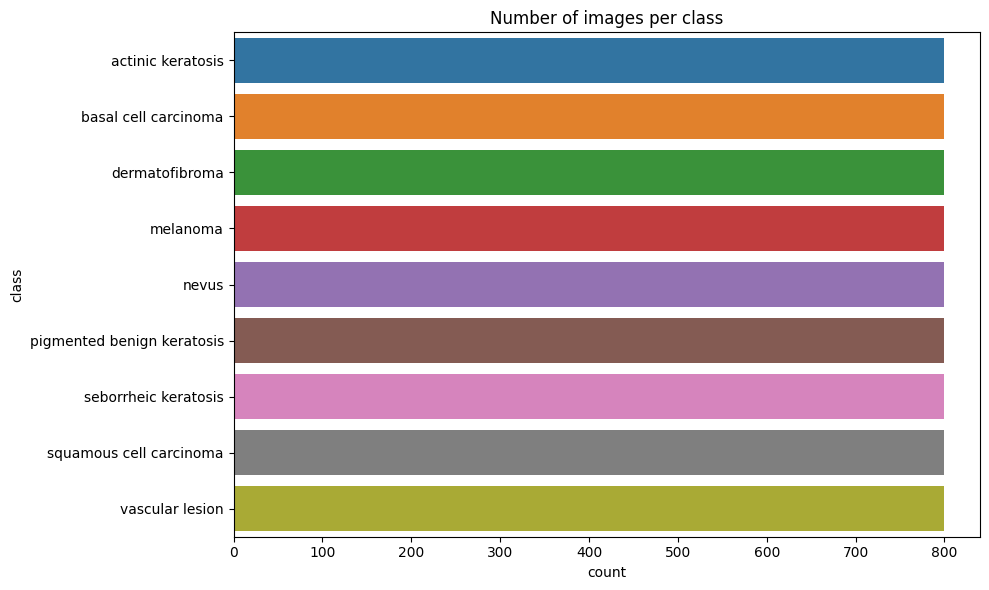

In [ ]:

# Define the new directory
data_dir_train_aug = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")

counts = []
for c in class_names:

    # Count the total number of images in the class directory
    num_images = len(list(data_dir_train_aug.glob(str(c) + '/*.jpg')))
    
    # Count the number of images in the output folder in the class directory
    output_images = len(list(data_dir_train_aug.glob(str(c) + '/output/*.jpg')))

    # Add the counts to the list
    counts.append(num_images + output_images)

    # Create a DataFrame with the counts
train_ds_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_ds_dist, y='class', x='count', hue='class', legend=False)
plt.title('Number of images per class')

plt.tight_layout()
plt.show()

In [ ]:
# ## Your code goes here.
# # Get the count of images in each class
# counts = []
# for c in class_names:

#     # Count the total number of images in the class directory
#     num_images = len(list(data_dir_train.glob(str(c) + '/*.jpg')))
#     print (num_images)
#     # Count the number of images in the output folder in the class directory
#     output_images = len(list(data_dir_train.glob(str(c) + '/output/*.jpg')))
#     print(output_images)

#     # Add the counts to the list
#     counts.append(num_images + output_images)

# # Create a DataFrame with the counts
# class_dist = pd.DataFrame({'class': class_names, 'count': counts})

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=class_dist, y='class', x='count')
# plt.title('Number of images per class')

# # Add bar labels
# ax.bar_label(ax.containers[0])

# plt.tight_layout()
# plt.show()



In [ ]:
import shutil

for c in class_names:
    output_dir = data_dir_train_aug / c / 'output'
    for filename in os.listdir(output_dir):
        new_filename = filename.replace(f"{c}_original_", '')
        os.rename(os.path.join(output_dir, filename), os.path.join(output_dir, new_filename))
        shutil.move(os.path.join(output_dir, new_filename), os.path.join(data_dir_train_aug, c))

    # Delete the empty output folder
    shutil.rmtree(output_dir)


In [ ]:
# Define the new train_ds dataset
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_aug,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 7200 files belonging to 9 classes.


#### gridsearch

In [ ]:
# # # Compile the model
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # # build the model
# # model.build(input_shape=(None, img_height, img_width, 3))

# # model summary
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 random_brightness (RandomBr  (None, 180, 180, 3)      0         
 ightness)                                                       
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)     

In [ ]:
# num_images = 0
# for images, labels in train_ds_aug:
#     num_images += images.shape[0]
# print(num_images)

3330


In [ ]:
# Convert the datasets to numpy arrays for GridSearchCV
x_train = np.concatenate([x for x, y in train_ds_aug], axis=0)
y_train = np.concatenate([y for x, y in train_ds_aug], axis=0)
print(len(x_train))
x_val = np.concatenate([x for x, y in val_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)
print(len(x_val))

# # Convert the datasets to numpy arrays
# x_train = np.concatenate([x[None, :] for x, y in train_ds_unbatched], axis=0)
# y_train = np.array([y for x, y in val_ds_unbatched])
# print(len(y_train))

# x_val = np.concatenate([x[None, :] for x, y in val_ds_unbatched], axis=0)
# y_val = np.array([y for x, y in val_ds])
# print(y_val)

# x_val, y_val = zip(*val_ds)
# x_val = np.array(x_val)
# y_val = np.array(y_val)

# print(y_val)


7200
447


In [ ]:
!pip install scikeras


The error message indicates that beta_1 is not a recognized parameter for the KerasClassifier. This is because beta_1 is a parameter for the optimizer (Adam in this case), not the model itself.

In Scikit-learn's GridSearchCV, the parameters in the grid should be parameters of the estimator (KerasClassifier in this case). However, KerasClassifier doesn't directly accept optimizer parameters like beta_1, beta_2, etc.

To tune the optimizer parameters with GridSearchCV, you can pass these parameters to your create_model function, and use them when creating the optimizer. Then, in param_grid, you can prepend these parameter names with model__ to indicate that they are parameters of the model-building function.

In [ ]:

def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False):
    # Create a simplified version of the VGG16 model
    old_model = create_simplified_vgg16_model()

    # initialize new model
    model = Sequential()

    # Add the data augmentation layers to the new model
    [model.add(layer) for layer in data_augmentation.layers]

    # Add the old model layers to the new model
    [model.add(layer) for layer in old_model.layers]
    
    optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)#, decay=decay)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = create_model()
model.build(input_shape=(None, 180, 180, 3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 180, 180, 3)    │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


2024-03-14 16:57:37.094514: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2231 - loss: 2.4112 - val_accuracy: 0.3199 - val_loss: 2.0026
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2830 - loss: 1.9707 - val_accuracy: 0.3669 - val_loss: 1.7418
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3229 - loss: 1.7901 - val_accuracy: 0.4474 - val_loss: 1.6469
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3815 - loss: 1.6940 - val_accuracy: 0.4362 - val_loss: 1.5510
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4492 - loss: 1.5326 - val_accuracy: 0.4564 - val_loss: 1.4989
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4420 - loss: 1.5058 - val_accuracy: 0.5213 - val_loss: 1.4382
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4784 - loss: 1.4615 - val_accuracy: 0.5257 - val_loss: 1.3967
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4824 - loss: 1.3893 - val_accuracy: 0.4966 - val_loss: 1.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from scikeras.wrappers import KerasClassifier

from keras.optimizers import SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Nadam, Ftrl
# Importing required layers from tensorflow.keras to build model
from keras.layers import Conv2D     # Convolutional 2D Layer for image processing
from keras.layers import MaxPooling2D  # MaxPooling 2D Layer for downsampling input
from keras.layers import Flatten    # Flatten Layer for transforming input to 1D array
from keras.layers import Dense      # Dense Layer for output and hidden layers

# initialize create_simplified_vgg16_model function
def create_simplified_vgg16_model():
    
    # Clear the Keras session
    tf.keras.backend.clear_session()

    # Create a Sequential model
    model = Sequential([

        # Normalize pixel values between 0 and 1
        layers.Rescaling(1./255),

        # Convolutional block 1
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten layer
        Flatten(),

        # Fully connected layers
        Dense(128, activation='relu'),
        Dense(9, activation='softmax')
    ])
    return model

data_augmentation = keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),

    # Randomly rotate images by a fraction of 2
    layers.RandomRotation(1),

    # # Randomly zoom images in and out
    # layers.RandomZoom(0.2),

    # Randomly adjust the brightness of images
    layers.RandomBrightness(0.2)
])

# def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False):
#     # Create a simplified version of the VGG16 model
#     old_model = create_simplified_vgg16_model()

#     # initialize new model
#     model = Sequential()

#     # Add the data augmentation layers to the new model
#     [model.add(layer) for layer in data_augmentation.layers]

#     # Add the old model layers to the new model
#     [model.add(layer) for layer in old_model.layers]
    
#     optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)#, decay=decay)
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#     return model

from keras.layers import Dense, Conv2D, Flatten, Input
from keras.models import Sequential, Model
from keras.losses import SparseCategoricalCrossentropy
# from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False):
    # Create a simplified version of the VGG16 model
    # old_model = create_simplified_vgg16_model()
    # model = Sequential()
    # model = create_simplified_vgg16_model()

    # # initialize new model
    # inputs = keras.Input(shape=(150, 150, 3))  # Adjust the input shape to match your data
    # x = data_augmentation(inputs)
    # x = old_model(x)
    
    # model = keras.Model(inputs, x)


    #    # create model
    # model = Sequential()
    # model.add(Conv2D(32, kernel_size=3, activation='relu'))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(10, activation='softmax'))
    # # Compile model
    # # model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # # return model

    # Define the input with the desired shape
    input_img = Input(shape=(180, 180, 3))
    
    # Create the layers and pass the input through them
    x = Conv2D(32, kernel_size=3, activation='relu')(input_img)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=input_img, outputs=output)

    optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Wrap Keras model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__learning_rate': [0.001, 0.01],# 0.1, 0.2, 0.3],
    'model__beta_1': [0.89, 0.9],# 0.91, 0.92],# 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    'model__beta_2': [0.999, 0.9995],# 0.9999],
    'model__epsilon': [1e-7, 1e-8],
    # 'model__decay': [0.0, 0.01, 0.1],
    'model__amsgrad': [False], #True]
}

# Convert the datasets to numpy arrays for GridSearchCV
x_train = np.concatenate([x for x, y in train_ds], axis=0)
y_train = np.concatenate([y for x, y in train_ds], axis=0)

x_val = np.concatenate([x for x, y in val_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

# Combine the training and validation sets
x_combined = np.vstack((x_train, x_val))
y_combined = np.hstack((y_train, y_val))

print("x_combined: ", x_combined.shape)
print("y_combined: ", y_combined.shape)

# Create an array where training instances are -1 and validation instances are 0
test_fold = np.concatenate([
    -np.ones(len(x_train)), # Training set
    np.zeros(len(x_val))    # Validation set
])

# Create the PredefinedSplit based on the test_fold array
ps = PredefinedSplit(test_fold)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=ps, verbose=1)

# from tqdm import tqdm
# # Run GridSearchCV with 10 epochs
# with tqdm(total=10) as pbar:
#     for i in range(10):
#         grid_result = grid.fit(x_combined, y_combined, epochs=1)
#         pbar.update()

from keras.callbacks import Callback
from keras import backend as K
import gc

# Custom callback to delete the model after each fit
class ClearModelCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        K.clear_session()
        gc.collect()

# Now, include this callback in your GridSearchCV
grid_result = grid.fit(x_combined, y_combined, epochs=10, callbacks=[ClearModelCallback()])
# # Run GridSearchCV
# grid_result = grid.fit(x_combined, y_combined, epochs=10)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Convert the cv_results_ dictionary to a pandas DataFrame
cv_results_df = pd.DataFrame(grid_result.cv_results_)

# Print the DataFrame
display(cv_results_df.head(10))


2024-03-14 17:57:20.173998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-14 17:57:20.459465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-14 17:57:21.081225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-14 17:57:21.155967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


x_combined:  (2239, 180, 180, 3)
y_combined:  (2239,)
Fitting 1 folds for each of 16 candidates, totalling 16 fits


I0000 00:00:1710439045.188107   61399 service.cc:145] XLA service 0x7ac67c004b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710439045.188167   61399 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-03-14 17:57:25.215951: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-14 17:57:25.348543: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1710439048.326892   61399 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-14 18:01:08.570678: W external/local_tsl/tsl/framework/bfc_allocator.cc:487] Allocator (GPU_0_bfc) ran out of memory trying to allocate 664.45MiB (rounded to 696729600)requested by op _EagerConst
If the cause is memory fragmentation maybe the enviro

ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khang/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 536, in _fit_keras_model
    raise e
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 531, in _fit_keras_model
    key = metric_name(key)
          ^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/utils/__init__.py", line 111, in metric_name
    fn_or_cls = keras_metric_get(metric)
                ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/keras/src/metrics/__init__.py", line 204, in get
    raise ValueError(f"Could not interpret metric identifier: {identifier}")
ValueError: Could not interpret metric identifier: loss

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khang/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 123, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/khang/env/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py", line 108, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tensorflow.python.framework.errors_impl.InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khang/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/scikeras/wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_61169/3827535983.py", line 112, in create_model
    x = Dense(128, activation='relu')(x)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/khang/env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 123, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/khang/env/lib/python3.11/site-packages/tensorflow/python/framework/ops.py", line 5983, in raise_from_not_ok_status
    raise core._status_to_exception(e) from None  # pylint: disable=protected-access
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2] name: 


The code below:

In your create_model function, you're returning a model but you're not compiling it. You should compile the model inside the create_model function, and the parameters you want to optimize should be arguments of the function.

The parameters in param_grid should match the arguments of create_model.

You're using n_jobs=-1 in GridSearchCV which means use all processors. This can cause issues when used with Keras models because they are not pickleable, and joblib (which is used in GridSearchCV) uses pickling. It's better to set n_jobs=1 when working with Keras models.

After running grid.fit, there is no need to compile the model again. The best estimator found by GridSearchCV is already compiled and can be accessed with grid.best_estimator_.

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import PredefinedSplit
# from scikeras.wrappers import KerasClassifier

# def create_model():
#     # Create a simplified version of the VGG16 model
#     old_model = create_simplified_vgg16_model()

#     # initialize new model
#     model = Sequential()

#     # Add the data augmentation layers to the new model
#     [model.add(layer) for layer in data_augmentation.layers]

#     # Add the old model layers to the new model
#     [model.add(layer) for layer in old_model.layers]
#     return model

# # Wrap Keras model with KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#     'beta_1': [0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
#     'beta_2': [0.999, 0.9995, 0.9999],
#     'epsilon': [1e-7, 1e-8],
#     'decay': [0.0, 0.01, 0.1],
#     'amsgrad': [False, True]
# }

# # Convert the datasets to numpy arrays for GridSearchCV
# x_train = np.concatenate([x for x, y in train_ds_aug], axis=0)
# y_train = np.concatenate([y for x, y in train_ds_aug], axis=0)

# x_val = np.concatenate([x for x, y in val_ds], axis=0)
# y_val = np.concatenate([y for x, y in val_ds], axis=0)

# # Combine the training and validation sets
# x_combined = np.vstack((x_train, x_val))
# y_combined = np.hstack((y_train, y_val))

# # Create an array where training instances are -1 and validation instances are 0
# test_fold = np.concatenate([
#     -np.ones(len(x_train)), # Training set
#     np.zeros(len(x_val))    # Validation set
# ])

# # Create the PredefinedSplit based on the test_fold array
# ps = PredefinedSplit(test_fold)
# # in this code snippet, test_fold is an array that assigns a unique fold number to each sample.
# #  Samples with a fold number of -1 are always used as training data, and samples with 0 are used for testing 
# # (or validation in this case). The PredefinedSplit object ps is then used as the cv argument in GridSearchCV. 
# # This allows you to use your predefined training and validation sets during the grid search process. 
# # Remember to include this definition before initializing GridSearchCV with ps as the cv parameter.

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=ps)

# # Run GridSearchCV
# grid_result = grid.fit(x_train, y_train, validation_data=(x_val, y_val))


# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......random_brightness
.........vars
......random_flip
.........vars
......random_rotation
.........vars
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-03-13 20:10:20          861
variables.h5                                   2024-03-13 20:10:20         8072
metadata.json                                  2024-03-13 20:10:20           64
File Name                                             Modified             Size
config.json                                    2024-03-13 20:10:20          861
variables.h5                                   2024-03-13 20:10:20         8072
metadata.json                                  2024-03-13 20:10:20           64


#### continue

In [ ]:
# Create a simplified version of the VGG16 model
# old_model = create_simplified_vgg16_model()
# model = create_simplified_vgg16_model()
old_model = create_simplified_vgg16_model()

# initialize new model
model = Sequential()

# Add the data augmentation layers to the new model
[model.add(layer) for layer in data_augmentation.layers]

# Add the old model layers to the new model
[model.add(layer) for layer in old_model.layers]

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds_aug,
    epochs=20,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.1943 - loss: 2.0929 - val_accuracy: 0.4340 - val_loss: 1.6646
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.3916 - loss: 1.5801 - val_accuracy: 0.5190 - val_loss: 1.4477
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4303 - loss: 1.4843 - val_accuracy: 0.4407 - val_loss: 1.4421
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4599 - loss: 1.4083 - val_accuracy: 0.5056 - val_loss: 1.3860
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4574 - loss: 1.3772 - val_accuracy: 0.4586 - val_loss: 1.3992
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4705 - loss: 1.3509 - val_accuracy: 0.4787 - val_loss: 1.4182
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4896 - loss: 1.3250 - val_accuracy: 0.4609 - val_loss: 1.4859
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4900 - loss: 1.3139 - val_acc

In [ ]:

# Define the augmentation pipeline for each class
augmentors = []
for c in class_names:
    p = Augmentor.Pipeline(data_dir_train / c)
    # Add augmentation operations here
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    augmentors.append(p)

# Define the number of images to generate for each class
target_count = max(counts)

# Generate augmented images for each class
for i, p in enumerate(augmentors):
    p.sample(target_count - counts[i])


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- __Least Samples__: The class with the least number of samples is seborrheic keratosis.
- __Most Samples__: The classes that dominate the data with the most samples are melanoma and pigmented benign keratosis.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# Importing the Augmentor package for data augmentation
import Augmentor
import shutil

try:
    data_dir_train_aug = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")
    shutil.rmtree(data_dir_train_aug)
except:
    pass    

# Define the new directory

# Create the new directory
data_dir_train_aug.mkdir(parents=True, exist_ok=True)


In [ ]:
# Unbatch the dataset
train_ds_unbatched = train_ds.unbatch()

# Initialize a counter
i = 0

# Iterate over the train_ds and copy the images to the new directory
for image, label in train_ds_unbatched:
    class_name = class_names[label.numpy()]
    new_class_dir = data_dir_train_aug / class_name
    new_class_dir.mkdir(parents=True, exist_ok=True)
    filename = f"image_{i}.jpg"
    tf.keras.preprocessing.image.save_img(new_class_dir / filename, image)
    i += 1

In [ ]:
image_count_train_aug = len(list(data_dir_train_aug.glob('*/*.jpg')))

# Print the number of images in the Train_augmentor directory
print(image_count_train_aug)

In [ ]:
counts = []
for c in class_names:

    # Count the total number of images in the class directory
    counts.append(len(list(data_dir_train_aug.glob(str(c) + '/*.jpg'))))

# Augment training data
augmentors = []

# Loop through each class name
for c in class_names:

    # Create Augmentor pipeline for class
    p = Augmentor.Pipeline(data_dir_train_aug / c) 

    # Add data augmentation operations
    # Rotate images randomly between -5 and 5 degrees
    p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
    
    p.rotate_random_90(probability=1)

    # # Zoom images randomly between 0.8x and 1.2x original size
    # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

    # Flip images randomly both axes with 50% probability
    p.flip_random(probability=1) 

    # Add the random_distortion operation to the pipeline
    p.random_distortion(probability=1, grid_width=8, grid_height=8, magnitude=4)

    p.skew(probability=1, magnitude=0.6)

    # Add pipeline to list
    augmentors.append(p)



# Get count of images in class with most images  
target_count = 800

# Sample images from each pipeline to target count
for i, p in enumerate(augmentors):
    if (target_count - counts[i]) == 0: continue
    p.sample(target_count - counts[i])


Initialised with 92 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/actinic keratosis/output.Initialised with 309 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/basal cell carcinoma/output.Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/dermatofibroma/output.Initialised with 352 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/melanoma/output.Initialised with 277 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/nevus/output.Initialised with 370 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor/pigmented benign keratosis/output.Initialised with 58 image(s) f

Executing Pipeline:   0%|          | 0/708 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB154088250>: 100%|██████████| 708/708 [00:03<00:00, 190.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB154073F10>: 100%|██████████| 491/491 [00:02<00:00, 203.21 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB1505A1E50>: 100%|██████████| 723/723 [00:03<00:00, 195.25 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB15CC49210>: 100%|██████████| 448/448 [00:02<00:00, 203.11 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB10C6235D0>: 100%|██████████| 523/523 [00:02<00:00, 206.27 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB10C6B8CD0>: 100%|██████████| 430/430 [00:02<00:00, 199.76 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB10C438150>: 100%|██████████| 742/742 [00:03<00:00, 194.92 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7CB15048

In [ ]:

# path_to_training_dataset="To do"
# import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train_aug.glob('*/output/*.jpg')))
print(image_count_train)

5408


### Lets see the distribution of augmented data after adding new images to the original training data.

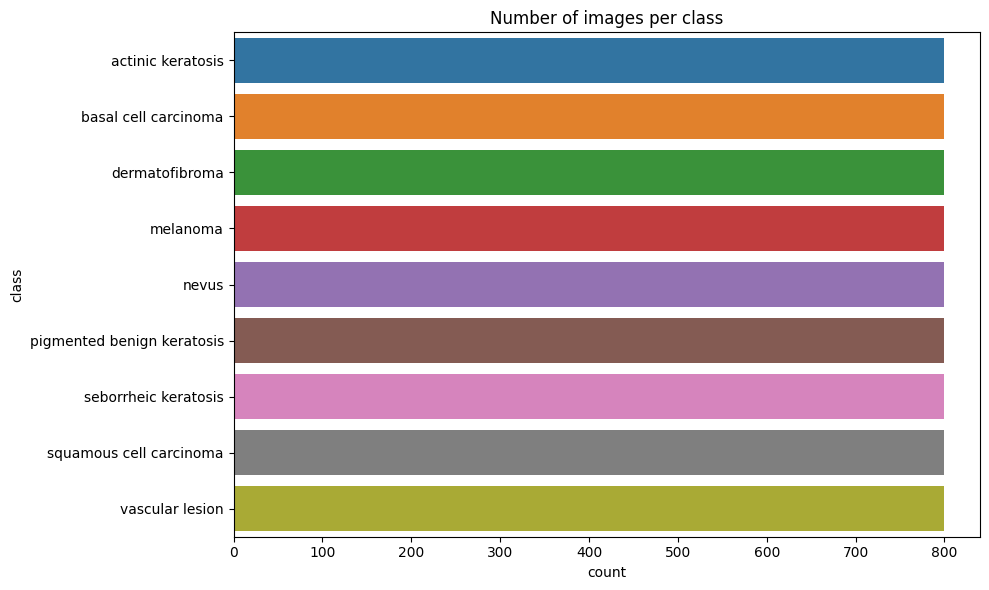

In [ ]:
# Define the new directory
data_dir_train_aug = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train_augmentor")

counts = []
for c in class_names:

    # Count the total number of images in the class directory
    num_images = len(list(data_dir_train_aug.glob(str(c) + '/*.jpg')))
    
    # Count the number of images in the output folder in the class directory
    output_images = len(list(data_dir_train_aug.glob(str(c) + '/output/*.jpg')))

    # Add the counts to the list
    counts.append(num_images + output_images)

    # Create a DataFrame with the counts
train_ds_dist = pd.DataFrame({'class': class_names, 'count': counts})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_ds_dist, y='class', x='count', hue='class', legend=False)
plt.title('Number of images per class')

plt.tight_layout()
plt.show()

In [ ]:
# import glob
# # path_list https://www.kaggle.com/code/bhanuduggal13/skin-cancer-detection
# path_list = [x for x in glob.glob(os.path.join(data_dir_train_aug, '*', '*.jpg'))]
# path_list_new = [x for x in glob.glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]

In [ ]:
# lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train_aug, '*', '*.jpg'))]
# # lesion_list_new https://jovian.com/shvmgrg98/starter-code-assignment-cnn-skin-cancer
# lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]

In [ ]:
# dataframe_dict_original=dict(zip(path_list,lesion_list))
# dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

# original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

# new_df = pd.concat([original_df, df2], ignore_index=True)

In [ ]:
# new_df['Label'].value_counts()

Label
Train_augmentor               1792
seborrheic keratosis           742
dermatofibroma                 723
actinic keratosis              708
vascular lesion                685
squamous cell carcinoma        658
nevus                          523
basal cell carcinoma           491
melanoma                       448
pigmented benign keratosis     430
Name: count, dtype: int64

In [ ]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [ ]:
# new_df['Label'].value_counts()

So, now we have added images so that each class would have total of 800 image to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
import shutil

for c in class_names:
    output_dir = data_dir_train_aug / c / 'output'
    for filename in os.listdir(output_dir):
        new_filename = filename.replace(f"{c}_original_", '')
        os.rename(os.path.join(output_dir, filename), os.path.join(output_dir, new_filename))
        shutil.move(os.path.join(output_dir, new_filename), os.path.join(data_dir_train_aug, c))

    # Delete the empty output folder
    shutil.rmtree(output_dir)


In [ ]:
data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = # your model fit code

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



test data augmentation

In [ ]:
import pathlib 
data_dir_check = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/check")
# Count the total number of images in the class directory
len(list(data_dir_check.glob('*.jpg')))

0

In [ ]:
check_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_check,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

NameError: name 'img_height' is not defined

In [ ]:
# Create Augmentor pipeline for class
p = Augmentor.Pipeline(data_dir_check / "A") 

# Add data augmentation operations
# Rotate images randomly between -5 and 5 degrees
p.rotate(probability=1, max_left_rotation=10, max_right_rotation=10)

p.rotate_random_90(probability=1)

# # Flip images randomly both axes with 50% probability
p.flip_random(probability=1) 

# Add the random_distortion operation to the pipeline
p.random_distortion(probability=1, grid_width=8, grid_height=8, magnitude=8)

p.skew(probability=1, magnitude=0.3)

print (p)
# Sample images from each pipeline
p.sample(20)


output_dir_check = data_dir_check / "A" / 'output'

for filename in os.listdir(output_dir_check):
    new_filename = filename.replace(f"A_original_", '')
    os.rename(os.path.join(output_dir_check, filename), os.path.join(output_dir_check, new_filename))


Initialised with 9 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/check/A/output.<Augmentor.Pipeline.Pipeline object at 0x7f2b2030d0c0>


Processing <PIL.Image.Image image mode=RGB size=450x600 at 0x7F2B203CB940>: 100%|██████████| 20/20 [00:00<00:00, 26.54 Samples/s]


In [ ]:
output_dir_check = data_dir_check / "A" / 'output'


In [ ]:
for filename in os.listdir(output_dir_check):
    print (filename)

ISIC_0026709.jpg
ISIC_0025957.jpg
ISIC_0025803.jpg
ISIC_0025780.jpg
ISIC_0026905.jpg
ISIC_0025953.jpg
ISIC_0026457.jpg
ISIC_0026171.jpg
ISIC_0025992.jpg


In [ ]:
for filename in os.listdir(output_dir_check):
    # Check if the file name exceeds the maximum length
    if len(filename) > 16:
        # Construct the full path to the file
        file_path = os.path.join(output_dir_check, filename)
        # Delete the file
        os.remove(file_path)
        print(f"Deleted {filename}")

Deleted ISIC_0026171_aug_8.jpg
Deleted ISIC_0025957_aug_2.jpg
Deleted ISIC_0025953_aug_6.jpg
Deleted ISIC_0026709_aug_1.jpg
Deleted ISIC_0025780_aug_4.jpg
Deleted ISIC_0025803_aug_3.jpg
Deleted ISIC_0026905_aug_5.jpg
Deleted ISIC_0026457_aug_7.jpg
Deleted ISIC_0025992_aug_9.jpg


In [ ]:
from keras import layers
import tensorflow as tf
import numpy as np
from PIL import Image
import os
# Load and preprocess the image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    # image = tf.image.decode_image(image, channels=3)
    # image = tf.image.decode_jpeg(image, channels=3)
    image = tf.io.decode_jpeg(image, channels=3)
    # image = tf.image.convert_image_dtype(image, tf.float32)
    # image_float32 = tf.cast(image, tf.float32)
    # image_scaled = image_float32 / 255.0
    return image


# Define the preprocessing pipeline
def preprocess_pipeline(image):
    image = layers.Resizing  (600,600, crop_to_aspect_ratio=True) (image)
    # image = layers.RandomFlip('horizontal_and_vertical')(image)
    # image = layers.RandomRotation(1)(image)
    # image = layers.RandomContrast(0.2)(image)
    # image = layers.RandomBrightness(0.2)(image)
    
    # image = layers.RandomZoom(0.2, 0.2)(image)
    # image = layers.RandomTranslation(0.2, 0.2)(image)
    # image = layers.CenterCrop (150,150)(image)  # Assuming target size is 224x224
    return image
count = 0
for filename in os.listdir(data_dir_check / "A"):
    if filename.endswith('.jpg'):
        count+=1
        # image_path = os.path.join(pathlib.Path.cwd(), data_dir_check, filename)
        image_path = os.path.join(data_dir_check / "A", filename)
        # Apply the preprocessing
        image = load_and_preprocess_image(image_path)
        augmented_image = preprocess_pipeline(image)

        # Convert the tensor to an image and save
        augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image.numpy())
        augmented_image.save(os.path.join(output_dir_check, f"{filename[:-4]}_aug_{count}.jpg"))
        # this code below save the preprocessing image brither first
        # augmented_image.save(os.path.join(output_dir_check, filename))
    else: continue
